## WSDM - KKBox's Music Recommendation Challenge

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "data/"]).decode("utf8"))

members.csv
members.csv.7z
sample_submission.csv
sample_submission.csv.7z
song_extra_info.csv
song_extra_info.csv.7z
songs.csv
songs.csv.7z
test.csv
test.csv.7z
train.csv
train.csv.7z



### Exploratory Analysis  - train set


In [2]:
df_train = pd.read_csv("data/train.csv")
# df_songs = pd.read_csv("../input/songs.csv")
# df_songs_extra = pd.read_csv("../input/song_extra_info.csv")
# df_members = pd.read_csv("../input/members.csv",parse_dates=["registration_init_time","expiration_date"])
# df_test = pd.read_csv("../input/test.csv")

In [3]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103e9e290>]], dtype=object)

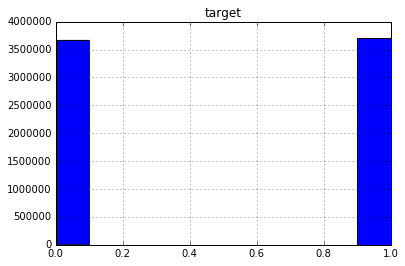

In [4]:
df_train.hist()

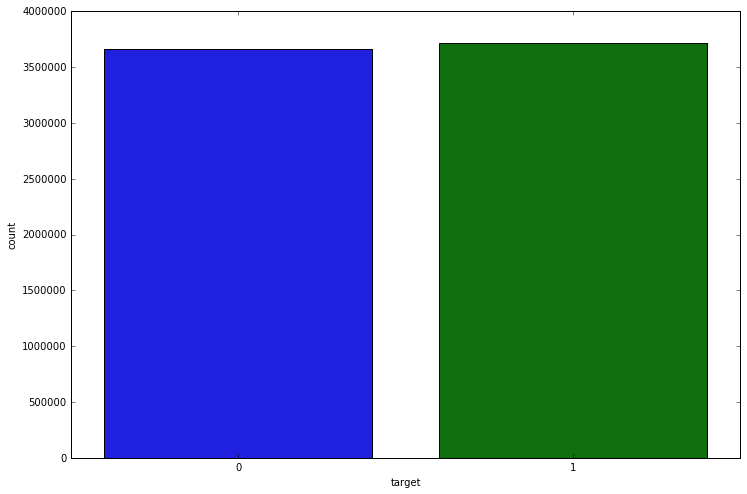

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(df_train['target'])

In [6]:
print "Number of unique songs is ",df_train['song_id'].nunique()

Number of unique songs is  359966


['Explore', 'Local playlist more', nan, 'My library', 'Online playlist more', 'Album more', 'Discover Feature', 'Unknown', 'Discover Chart', 'Radio', 'Artist more', 'Search', 'Others profile more', 'Search Trends', 'Discover Genre', 'My library_Search', 'Search Home', 'Discover New', 'Self profile more', 'Concert', 'Payment']
['online-playlist', 'local-playlist', 'local-library', 'top-hits-for-artist', 'album', nan, 'song-based-playlist', 'radio', 'song', 'listen-with', 'artist', 'topic-article-playlist', 'my-daily-playlist']


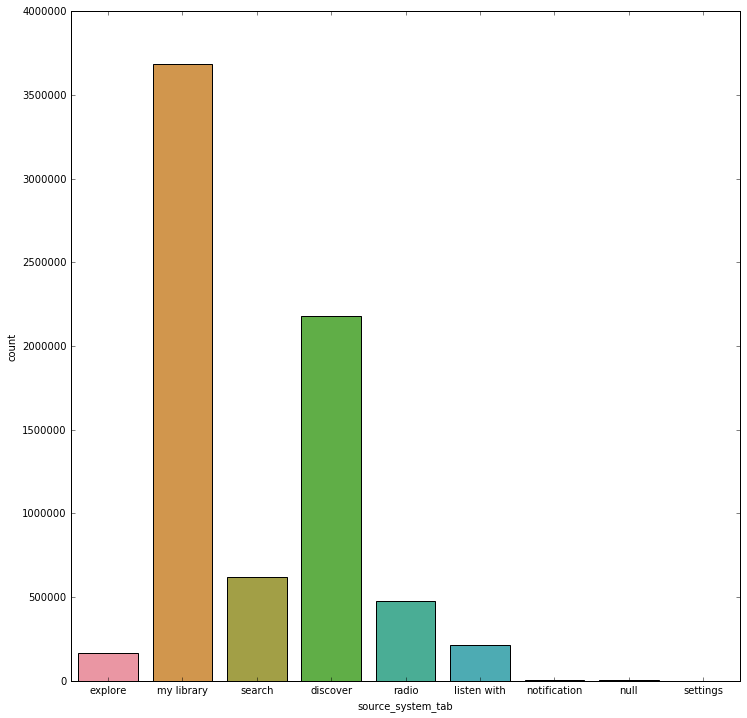

In [104]:
plt.figure(figsize=(12,12))
sns.countplot(df_train['source_system_tab'])
print list(df_train.source_screen_name.unique())
print list(df_train.source_type.unique())

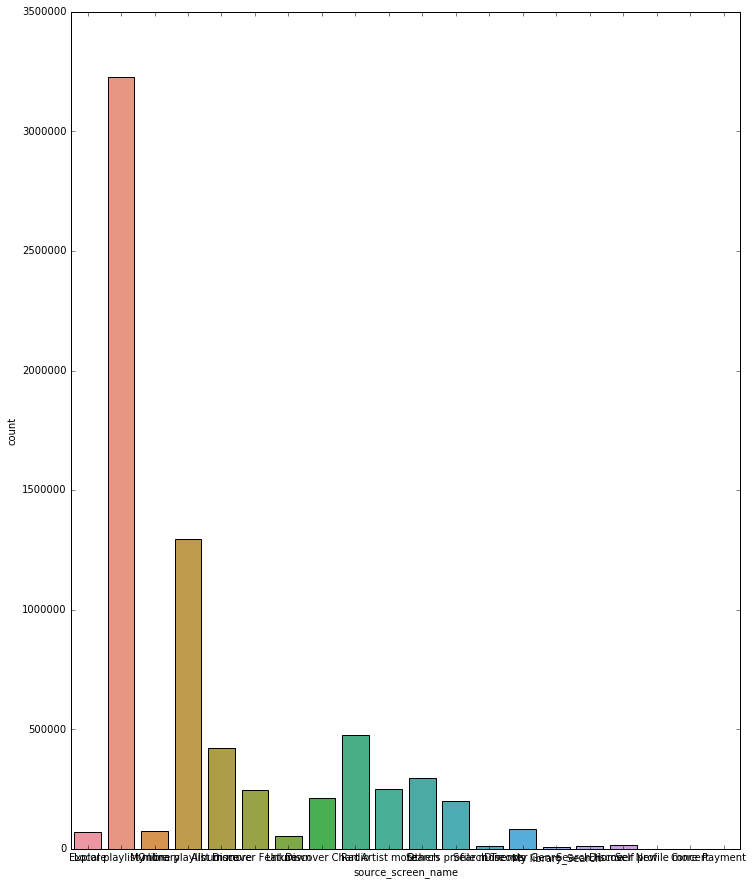

In [8]:
plt.figure(figsize=(12,15))
sns.countplot(df_train['source_screen_name'])

In [9]:
df_train.source_screen_name.unique()

array(['Explore', 'Local playlist more', nan, 'My library',
       'Online playlist more', 'Album more', 'Discover Feature', 'Unknown',
       'Discover Chart', 'Radio', 'Artist more', 'Search',
       'Others profile more', 'Search Trends', 'Discover Genre',
       'My library_Search', 'Search Home', 'Discover New',
       'Self profile more', 'Concert', 'Payment'], dtype=object)

In [10]:
df_train.source_type.unique()

array(['online-playlist', 'local-playlist', 'local-library',
       'top-hits-for-artist', 'album', nan, 'song-based-playlist', 'radio',
       'song', 'listen-with', 'artist', 'topic-article-playlist',
       'my-daily-playlist'], dtype=object)

### Exploratory Analysis - songs 

In [90]:
df_songs = pd.read_csv("data/songs.csv")
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [91]:
df_songs[ df_songs.genre_ids == "1259|2107" ]
df_songs['genre_id_list'] = df_songs.genre_ids.apply(lambda x: str(x).split('|'))
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 8 columns):
song_id          object
song_length      int64
genre_ids        object
artist_name      object
composer         object
lyricist         object
language         float64
genre_id_list    object
dtypes: float64(1), int64(1), object(6)
memory usage: 140.2+ MB


In [59]:
print df_songs.song_length.describe()
print len(df_songs.song_length.unique()) 
print 2296320 - len( df_songs.query("song_length < 2.469935e+05") )
df_songs_sample = df_songs.sample(n=10)
df_songs_sample

count    2.296320e+06
mean     2.469935e+05
std      1.609200e+05
min      1.850000e+02
25%      1.836000e+05
50%      2.266270e+05
75%      2.772690e+05
max      1.217385e+07
Name: song_length, dtype: float64
146534
876424


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,genre_id_list,composer_list,lyricist_list
917687,sBUxhWJ67eDqASe3q8vLEKt1Hg+/akt3CIHNpLjC440=,397990,1609,Monoverse,S. Torres,NaN,52.0,[1609],[S. Torres],[nan]
2276986,ISyPXYq8tvrAJKuRQcgZ0V5vG5WLwlsgZQZXMU9f/zU=,109691,465,Julie London,Redd Evans| Dave Mann,NaN,52.0,[465],"[Redd Evans, Dave Mann]",[nan]
455866,CIK5fkGgdT6XK+ONl0mjdEYgdmVi0vL1XZNdSyfYJIo=,4725167,1609,DJ Radionix,NaN,NaN,52.0,[1609],[nan],[nan]
665559,7zUF1w3FgbW+4E3+wI6giWh527BiN1ufzwEnWuBkaIY=,199320,2022,Get Set Go,NaN,NaN,52.0,[2022],[nan],[nan]
2146429,/MLzCBAnAFQlrWuqNXSihqF0aStluAhBceAq1j9Giqk=,230132,1609,キセノンP,NaN,NaN,-1.0,[1609],[nan],[nan]
1669093,8TchUIihM6H2OK2JS4utoSpvG/77Z6XorwwHEbVxHrY=,158824,2122,Dean Martin,Bo Chatmon| Mitchell Parish| J. Mayo Williams,NaN,52.0,[2122],"[Bo Chatmon, Mitchell Parish, J. Mayo Williams]",[nan]
574140,+EVJGQnfUfrTsNfHF9V3EQ0OT56PA3VKInhgEOy5Eok=,159451,1259,Enschway & sumthin sumthin,NaN,NaN,52.0,[1259],[nan],[nan]
1338255,WLl+0AzlKnOH8j5IkJwS+GaVTB+WPsR81dndCaJQy9Y=,235206,465,Various Artists,NaN,NaN,52.0,[465],[nan],[nan]
189057,rAMQ6z+Q9ksMMarp/O992lnfGU9Ah/D9TL0seAOCVb8=,307943,829,陳世川,陳世川,陳世川,3.0,[829],[陳世川],[陳世川]
1819281,vINcMe8UVurWhpoq+LCSOSIbebsu0JfqVxp5gcx3R40=,207586,465,Aretha Franklin,NaN,NaN,52.0,[465],[nan],[nan]


,song_id,song_length,genre_ids,composer,lyricist,language,genre_id_list,bin_song_length,composer_list,lyricist_list
artist_name,,,,,,,,,,
!Conz,1,1,1,0,0,1,1,1,1,1
!Creekside,2,2,2,2,0,2,2,2,2,2
!Dela Dap,40,40,40,0,0,40,40,40,40,40
!Dris,4,4,4,0,0,4,4,4,4,4
!Estevan,1,1,1,1,0,1,1,1,1,1
!Fuckyeah!,1,1,1,0,0,1,1,1,1,1
!NTELLIGENT Electro Pop,1,1,1,0,0,1,1,1,1,1
!Ntell!Gent Des!Gn| DJ Shoba,1,1,1,0,0,1,1,1,1,1
!a!,2,2,2,0,0,2,2,2,2,2


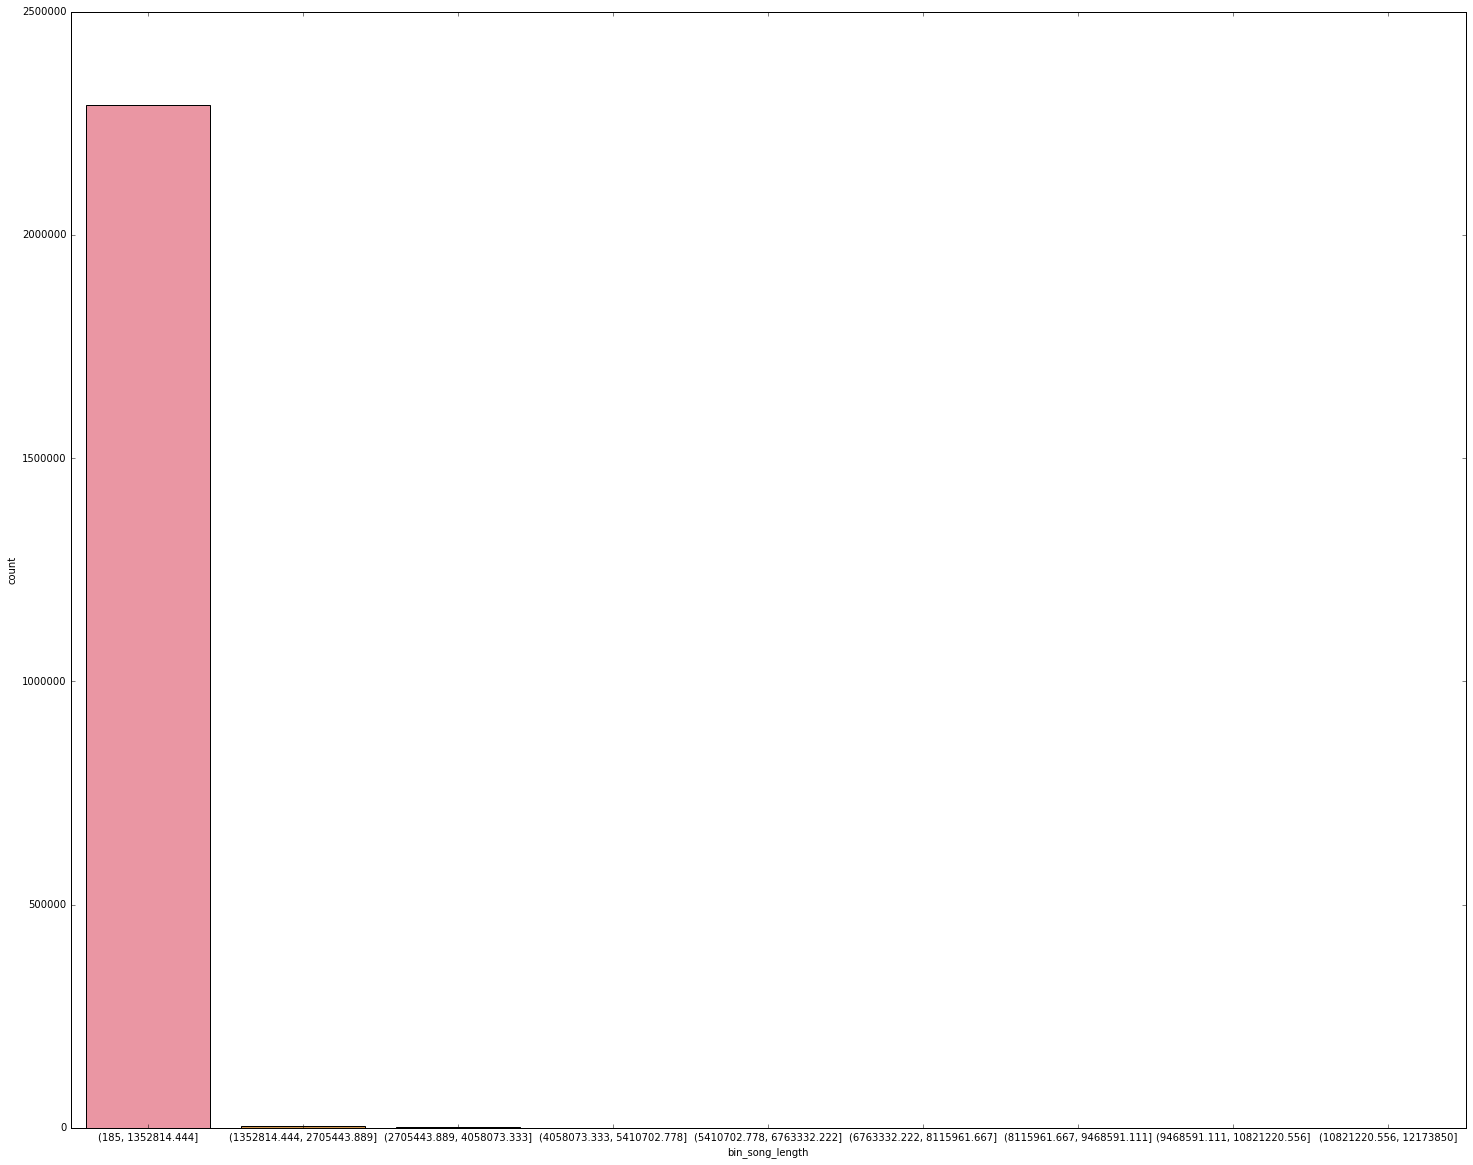

In [101]:
# Bin the data frame by "song length" with 5 bins...
bins = np.linspace(df_songs.song_length.min(), df_songs.song_length.max(), 10)
df_songs['bin_song_length'] = pd.cut(df_songs.song_length, bins)
df_songs['artist_name'] = df_songs['artist_name'].astype('str')
mask = (df_songs['artist_name'].str.len() < 500)
df_songs = df_songs.loc[mask]
# df_songs.query("len(artist_name) < 100")
# Get the mean of b, binned by the values in a
# print bins
# df_songs.head()
plt.figure(figsize=(25,20))
sns.countplot(df_songs.bin_song_length)

#  total - 2296320
df_songs.groupby(df_songs.artist_name).count()


In [98]:
df_songs.groupby(df_songs.language).count()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,genre_id_list,bin_song_length,composer_list,lyricist_list
language,,,,,,,,,,
-1.0,639467,639467,610268,639467,314741,31608,639467,639467,639467,639467
3.0,106295,106295,104900,106295,67669,55126,106295,106295,106295,106295
10.0,15482,15482,15188,15482,8730,6839,15482,15482,15482,15482
17.0,92518,92518,88733,92518,66945,41483,92518,92518,92518,92518
24.0,41744,41744,41528,41744,31803,15661,41744,41744,41744,41744
31.0,39201,39201,38010,39201,15864,11031,39201,39201,39201,39201
38.0,2385,2385,1787,2385,1461,799,2385,2385,2385,2385
45.0,14435,14435,5504,14435,4480,11149,14435,14435,14435,14435
52.0,1336692,1336692,1288601,1336692,707132,176691,1336692,1336690,1336692,1336692


In [96]:
df_songs['composer_list'] = df_songs.composer.apply(lambda x: str(x).split('|'))
df_songs['lyricist_list'] = df_songs.lyricist.apply(lambda x: str(x).split('|'))
df_songs[ df_songs.genre_ids == "1259|2107" ]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,genre_id_list,bin_song_length,composer_list,lyricist_list
2270295,zk9Egyf0ghw8qLV/l/vXNTfPBfPCopCT7ow803mbZD0=,203232,1259|2107,Mi Puga Mi Pishgo,Valeria Valencia| Paulo Pereyra,Valeria Valencia| Paulo Pereyra,52.0,"[1259, 2107]","(185, 1352814.444]","[Valeria Valencia, Paulo Pereyra]","[Valeria Valencia, Paulo Pereyra]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1040be590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b183810>]], dtype=object)

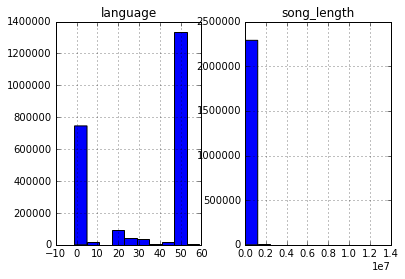

In [14]:
df_songs.hist()

In [15]:
df_members = pd.read_csv("data/members.csv")
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
No of unique members 34403


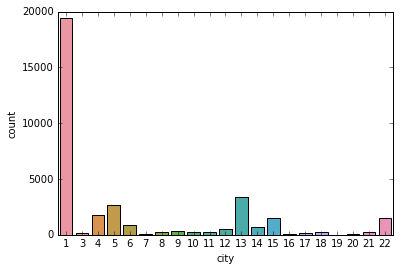

In [16]:
sns.countplot(df_members['city'])
df_members.info()
print "No of unique members", df_members['msno'].nunique()

In [17]:
df_members["registration_init_time"] = pd.to_datetime(df_members["registration_init_time"],format='%Y%m%d', errors='ignore')
df_members["expiration_date"] = pd.to_datetime(df_members["expiration_date"],format='%Y%m%d', errors='ignore')
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [18]:
from datetime import datetime, date, time, timedelta

df_members['days_td'] = df_members['expiration_date'].sub(df_members['registration_init_time'],axis=0)
df_members.head()
df_members_regi = df_members[['registered_via','days_td']]
df_members_regi.info()
df_members_regi['days'] = df_members_regi['days_td'].apply( lambda x: x.days )
del df_members_regi['days_td']
df_members_regi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 2 columns):
registered_via    34403 non-null int64
days_td           34403 non-null timedelta64[ns]
dtypes: int64(1), timedelta64[ns](1)
memory usage: 537.6 KB


/Users/srimi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,registered_via,days
0,7,2223
1,7,725
2,4,457
3,9,1
4,4,138


In [32]:
#https://chrisalbon.com/python/pandas_apply_operations_to_groups.html

#Checking the average days that user stayed based on their way of registering
print dict(df_members_regi['days'].groupby(df_members_regi['registered_via']).mean())

#Checking the user count based on city 
print dict(df_members['msno'].groupby(df_members['city']).count())

{3: 1067.0096331215414, 4: 119.35279143258427, 7: 1210.5193469733913, 9: 2266.4270978210479, 13: 232.32857142857142, 16: 0.0}
{1: 19445, 3: 204, 4: 1732, 5: 2634, 6: 913, 7: 93, 8: 289, 9: 309, 10: 216, 11: 285, 12: 491, 13: 3395, 14: 708, 15: 1525, 16: 35, 17: 152, 18: 259, 19: 11, 20: 27, 21: 213, 22: 1467}


(-10, 100)

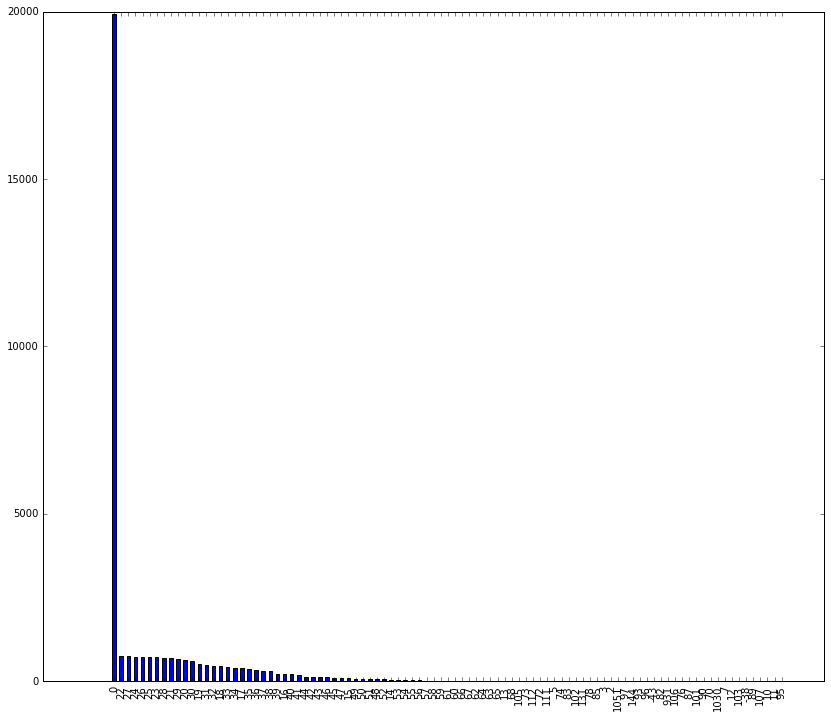

In [34]:
# for plotting multiple values in a single image
# plt.figure(figsize=(15,12))
# sns.countplot(df_train_temp['bd'],hue=df_train_temp['target'])

plt.figure(figsize=(14,12))
df_members['bd'].value_counts(sort=True).plot.bar()
plt.xlim([-10,100])

(-10, 100)

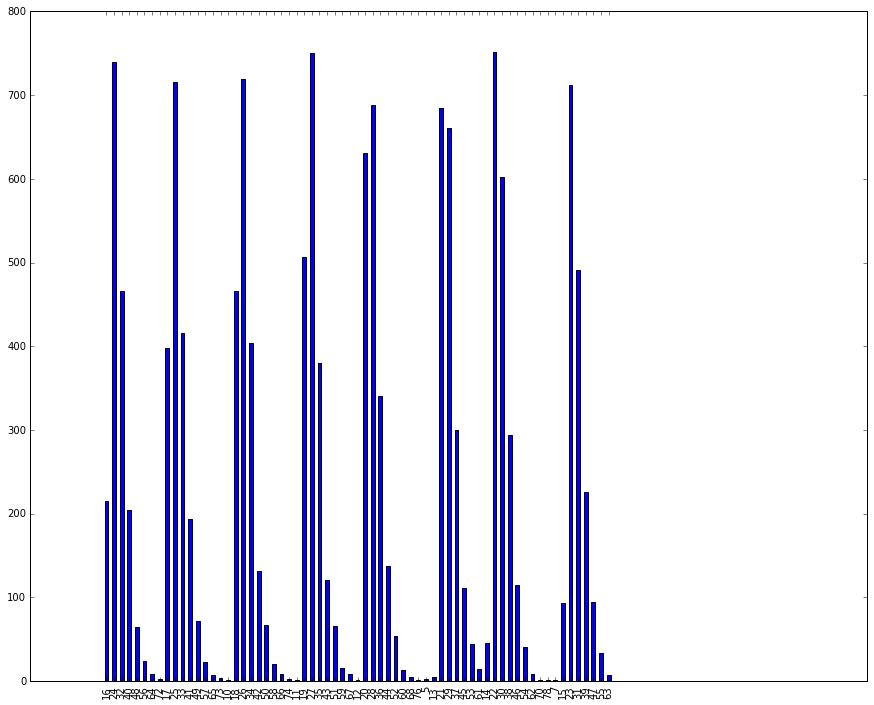

In [36]:
df_train_temp = df_members.query("bd >=5 and bd <80")
plt.figure(figsize=(15,12))
df_train_temp['bd'].value_counts(sort=False).plot.bar()
plt.xlim([-10,100])

In [20]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [21]:
df_song_extra_info = pd.read_csv("data/song_extra_info.csv")
df_song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [22]:
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

datetime.datetime(1300, 1, 1, 0, 0)